In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP.models import ModelSpec as MS
from ISLP.models import sklearn_sm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from scipy.stats import gaussian_kde

In [2]:
data = pd.read_csv('data/processed/Los_Angeles_Accidents_2016_2023.csv')
print(data)

     Accident_Date  Severity  Temperature(F) Weather_Condition  Humidity(%)  \
0       2016-03-22  2.400000       63.040000             Clear    26.000000   
1       2016-03-23  2.529412       68.491176             Clear    29.794118   
2       2016-03-24  2.485294       68.372059             Clear    33.544118   
3       2016-03-25  2.533333       65.831111             Clear    56.088889   
4       2016-03-26  2.736842       64.394737             Clear    70.631579   
...            ...       ...             ...               ...          ...   
2488    2023-03-27  2.000000       62.089888              Fair    28.528090   
2489    2023-03-28  2.000000       61.981982              Fair    37.765766   
2490    2023-03-29  2.014706       52.264706              Rain    80.794118   
2491    2023-03-30  2.000000       51.096774            Cloudy    75.322581   
2492    2023-03-31  2.000000       60.051282              Fair    57.076923   

      Pressure(in)  Visibility(mi)  Wind_Speed(mph)

In [3]:
data.columns

Index(['Accident_Date', 'Severity', 'Temperature(F)', 'Weather_Condition',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'total_accidents'],
      dtype='object')

In [4]:
terms = data.columns.drop(['Accident_Date', 'Severity', 'total_accidents'])
X = MS(terms).fit_transform(data)
X = pd.get_dummies(X, dtype=int)
y = data['total_accidents']

c:\Users\IbrahimAssi\.conda\envs\dsi_participant\lib\site-packages\ISLP\models\columns.py:159: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:


In [5]:
print(X)

      intercept  Temperature(F)  Humidity(%)  Pressure(in)  Visibility(mi)  \
0           1.0       63.040000    26.000000     30.016000       10.000000   
1           1.0       68.491176    29.794118     30.114559       10.000000   
2           1.0       68.372059    33.544118     30.008235        9.870588   
3           1.0       65.831111    56.088889     29.824444       10.000000   
4           1.0       64.394737    70.631579     29.853158        9.842105   
...         ...             ...          ...           ...             ...   
2488        1.0       62.089888    28.528090     29.928764       10.000000   
2489        1.0       61.981982    37.765766     29.881351       10.000000   
2490        1.0       52.264706    80.794118     29.748897        5.183824   
2491        1.0       51.096774    75.322581     29.758172        8.451613   
2492        1.0       60.051282    57.076923     29.999231       10.000000   

      Wind_Speed(mph)  Precipitation(in)  Weather_Condition_Cle

In [6]:
X.columns

Index(['intercept', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition_Clear', 'Weather_Condition_Cloudy',
       'Weather_Condition_Fair', 'Weather_Condition_Fog',
       'Weather_Condition_Haze', 'Weather_Condition_Heavy Rain',
       'Weather_Condition_Light Rain', 'Weather_Condition_Mostly Cloudy',
       'Weather_Condition_Overcast', 'Weather_Condition_Partly Cloudy',
       'Weather_Condition_Rain', 'Weather_Condition_Scattered Clouds',
       'Weather_Condition_Smoke'],
      dtype='object')

In [7]:
model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        total_accidents   No. Observations:                 2493
Model:                            GLM   Df Residuals:                     2474
Model Family:                 Poisson   Df Model:                           18
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25480.
Date:                Fri, 21 Jun 2024   Deviance:                       36480.
Time:                        21:15:56   Pearson chi2:                 3.56e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9901
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
intercept                              0.3978      0.788      0.505      0.614      -1.147       1.942
Temperature(F)                        -0.0055      0.000    -12.929      0.000      -0.006      -0.005
Humidity(%)                           -0.0034      0.000    -16.396      0.000      -0.004      -0.003
Pressure(in)                           0.1352      0.028      4.891      0.000       0.081       0.189
Visibility(mi)                         0.0009      0.003      0.329      0.742      -0.005       0.006
Wind_Speed(mph)                        0.0124      0.002      6.096      0.000       0.008       0.016
Precipitation(in)                      4.0460      0.438      9.239      0.000       3.188       4.904
Weather_Condition_Clear               -0.1538      0.076     -2.028      0.043      -0.302      -0.005
Weather_Condition_Cloudy               0.2406      0.070      3.417      0.001       0.103       0.379
Weather_Condition_Fair                 0.4495      0.071      6.349      0.000       0.311       0.588
Weather_Condition_Fog                  0.8226      0.090      9.173      0.000       0.647       0.998
Weather_Condition_Haze                 0.2483      0.073      3.389      0.001       0.105       0.392
Weather_Condition_Heavy Rain           0.1967      0.091      2.157      0.031       0.018       0.375
Weather_Condition_Light Rain           0.4237      0.074      5.730      0.000       0.279       0.569
Weather_Condition_Mostly Cloudy        0.0496      0.077      0.647      0.518      -0.101       0.200
Weather_Condition_Overcast            -0.1464      0.076     -1.924      0.054      -0.296       0.003
Weather_Condition_Partly Cloudy        0.3300      0.075      4.386      0.000       0.183       0.477
Weather_Condition_Rain                 0.7973      0.085      9.413      0.000       0.631       0.963
Weather_Condition_Scattered Clouds    -2.5157      0.469     -5.366      0.000      -3.435      -1.597
Weather_Condition_Smoke               -0.3446      0.175     -1.971      0.049      -0.687      -0.002
======================================================================================================
"""

In [8]:
valid_pred = results.predict()
np.mean((y - valid_pred)**2)

979.0379848962345

Text(0, 0.5, 'Fitted Values')

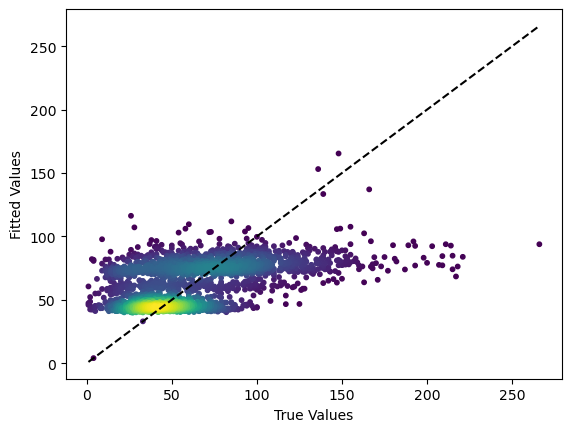

In [9]:
xy = np.vstack([y, valid_pred])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
plt.figure()
plt.scatter(y[idx], valid_pred[idx], c=z[idx], s=10)
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Fitted Values')

In [10]:
X2 = X.drop(columns=['intercept', 'Visibility(mi)'])

In [11]:
model2 = sm.GLM(y, X2, family=sm.families.Poisson())
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        total_accidents   No. Observations:                 2493
Model:                            GLM   Df Residuals:                     2475
Model Family:                 Poisson   Df Model:                           17
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25480.
Date:                Fri, 21 Jun 2024   Deviance:                       36480.
Time:                        21:16:03   Pearson chi2:                 3.56e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9901
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Temperature(F)                        -0.0055      0.000    -13.027      0.000      -0.006      -0.005
Humidity(%)                           -0.0035      0.000    -18.257      0.000      -0.004      -0.003
Pressure(in)                           0.1346      0.028      4.880      0.000       0.081       0.189
Wind_Speed(mph)                        0.0125      0.002      6.229      0.000       0.009       0.016
Precipitation(in)                      4.0195      0.430      9.337      0.000       3.176       4.863
Weather_Condition_Clear                0.2729      0.847      0.322      0.747      -1.388       1.934
Weather_Condition_Cloudy               0.6673      0.841      0.794      0.427      -0.980       2.315
Weather_Condition_Fair                 0.8760      0.841      1.041      0.298      -0.773       2.525
Weather_Condition_Fog                  1.2439      0.847      1.468      0.142      -0.417       2.904
Weather_Condition_Haze                 0.6720      0.844      0.796      0.426      -0.982       2.326
Weather_Condition_Heavy Rain           0.6227      0.845      0.737      0.461      -1.033       2.279
Weather_Condition_Light Rain           0.8493      0.844      1.006      0.314      -0.805       2.504
Weather_Condition_Mostly Cloudy        0.4767      0.845      0.564      0.573      -1.179       2.132
Weather_Condition_Overcast             0.2803      0.847      0.331      0.741      -1.380       1.941
Weather_Condition_Partly Cloudy        0.7569      0.842      0.899      0.369      -0.894       2.408
Weather_Condition_Rain                 1.2221      0.845      1.446      0.148      -0.434       2.878
Weather_Condition_Scattered Clouds    -2.0896      0.983     -2.126      0.033      -4.016      -0.164
Weather_Condition_Smoke                0.0784      0.856      0.092      0.927      -1.600       1.756
======================================================================================================
"""

In [12]:
valid_pred2 = results2.predict()
np.mean((y - valid_pred2)**2)

979.0294968449074

Text(0, 0.5, 'Fitted Values')

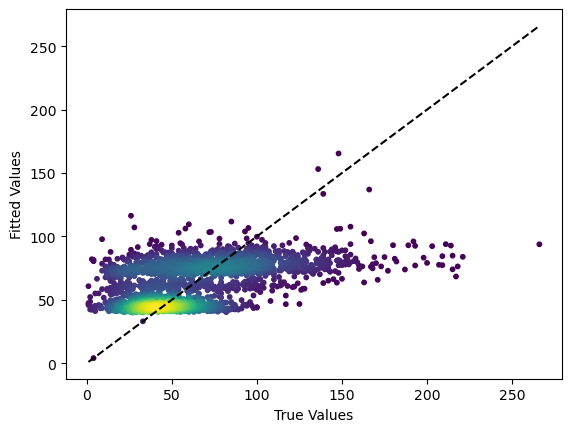

In [13]:
xy = np.vstack([y, valid_pred2])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
plt.figure()
plt.scatter(y[idx], valid_pred2[idx], c=z[idx], s=10)
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Fitted Values')

In [14]:
terms = data.columns.drop(['Accident_Date', 'Severity', 'total_accidents', 'Visibility(mi)', 'Weather_Condition'])
X3 = MS(terms).fit_transform(data)

c:\Users\IbrahimAssi\.conda\envs\dsi_participant\lib\site-packages\ISLP\models\columns.py:159: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:


In [15]:
model3 = sm.GLM(y, X3, family=sm.families.Poisson())
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        total_accidents   No. Observations:                 2493
Model:                            GLM   Df Residuals:                     2487
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -28132.
Date:                Fri, 21 Jun 2024   Deviance:                       41786.
Time:                        21:16:04   Pearson chi2:                 4.25e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9169
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept            35.1809      0.619     56.844      0.000      33.968      36.394
Temperature(F)       -0.0133      0.000    -34.337      0.000      -0.014      -0.013
Humidity(%)          -0.0067      0.000    -38.654      0.000      -0.007      -0.006
Pressure(in)         -0.9896      0.020    -48.658      0.000      -1.029      -0.950
Wind_Speed(mph)      -0.0559      0.002    -31.809      0.000      -0.059      -0.052
Precipitation(in)     5.1396      0.252     20.433      0.000       4.647       5.633
=====================================================================================
"""

In [16]:
valid_pred3 = results3.predict()
np.mean((y - valid_pred3)**2)

1121.5092439482287

Text(0, 0.5, 'Fitted Values')

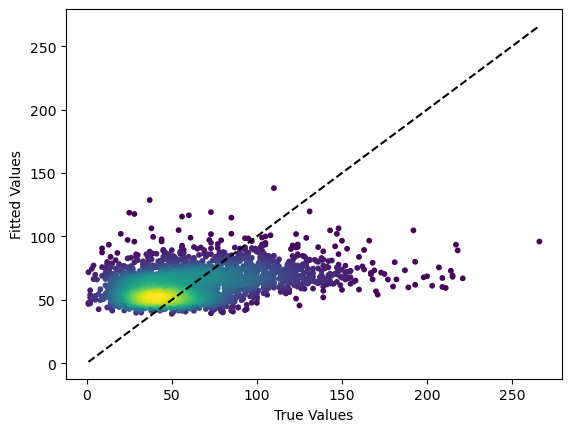

In [17]:
xy = np.vstack([y, valid_pred3])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
plt.figure()
plt.scatter(y[idx], valid_pred3[idx], c=z[idx], s=10)
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Fitted Values')